<h1 style='color:purple' align='center'>Data Analysis Project: Product Analysis- 'SPOTIFY'</h1>

## 1) Key Insights

### Univariate & Bivariate Analysis
- Top 5 most popular artists
- Top 5 loudest tracks
- Top 5 genres by popularity
- Artist with the most danceability song
- Top 10 instrumentalness tracks
- Loudness and Energy is highly correlated as loudness increases energy also increases
- Popularity and Acousticness is highly correlated as Popularity decreases Acousticness also decreases.
- World and classical genres have the songs with longest duration.
- From 1970 there have been a increasing trend on duration of songs but from 2000 we can see a decreasing trend.
- Number of songs released per year have always been increasing but last year the numbers dropped significantly. 
### Multivariate Analysis
- Heatmap




## 2) Data Collection
- Dataset Source -https://www.kaggle.com/datasets/geomack/spotifyclassification


## 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [290]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [291]:
df= pd.read_csv('tracks.csv')


### Top 5 Records

In [292]:

df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [293]:
df.rename(columns = {'name':'song_title'}, inplace = True)

### Shape of dataset

In [294]:
df.shape

(586672, 20)

## 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1) Check Missing Values

In [295]:
df.isna().sum()

id                   0
song_title          71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

**There are 71 missing Values in name. Since the dataset is huge we are dropping missing values**

In [296]:
df.dropna(axis=0,how="any",inplace=True) 

In [297]:
df.reset_index(inplace=True,drop=True)

### 3.2) Check Duplicated Values

In [298]:
df.duplicated().sum()


0

**There are 0 duplicated Value**

### 3.3) Check Data Types

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586601 entries, 0 to 586600
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   song_title        586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

### 3.4) Number of unique values of each column

In [300]:
df.nunique()

id                  586601
song_title          446474
popularity             101
duration_ms         123120
explicit                 2
artists             114029
id_artists          115062
release_date         19698
danceability          1285
energy                2571
key                     12
loudness             29196
mode                     2
speechiness           1655
acousticness          5217
instrumentalness      5402
liveness              1782
valence               1805
tempo               122702
time_signature           5
dtype: int64

### 3.5) Check Statistics of data set

In [301]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586601.0,27.573212,18.369417,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586601.0,230054.852626,126532.824981,3344.0,175083.0000,214907.000000,263867.00000,5621218.000
explicit,586601.0,0.044091,0.205298,0.0,0.0000,0.000000,0.00000,1.000
danceability,586601.0,0.563612,0.166101,0.0,0.4530,0.577000,0.68600,0.991
energy,586601.0,0.542071,0.251910,0.0,0.3430,0.549000,0.74800,1.000
key,586601.0,5.221594,3.519420,0.0,2.0000,5.000000,8.00000,11.000
loudness,586601.0,-10.205789,5.089422,-60.0,-12.8910,-9.242000,-6.48100,5.376
mode,586601.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586601.0,0.104870,0.179902,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586601.0,0.449803,0.348812,0.0,0.0969,0.422000,0.78400,0.996


### 3.7) Exploring Data

In [302]:
df.head()

,id,song_title,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [303]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical/datetime features : {}'.format(len(categorical_features), categorical_features))

We have 15 numerical features : ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

We have 5 categorical/datetime features : ['id', 'song_title', 'artists', 'id_artists', 'release_date']


### 4. Exploring Data(Visualization)

### Filtered data from 2019-2021 for better data visibility

In [304]:
df['release_year']=pd.to_datetime(df.release_date).dt.year


In [305]:
df1=df.query('release_year>2019').sort_values('release_date',ascending=False)

### Top 5 most popular artists

In [306]:
top_five_artists = df1.groupby("artists").count().sort_values(by="song_title", ascending=False)["song_title"][:5]
top_five_artists

artists
['J Balvin']          294
['Justin Bieber']     192
['Daddy Yankee']      156
['Workout Music ']    100
['Demi Lovato']        92
Name: song_title, dtype: int64

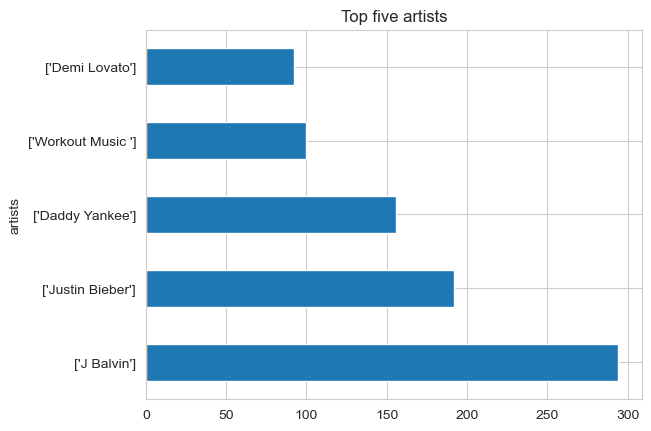

In [307]:
top_five_artists.plot.barh()
plt.title('Top five artists')
plt.show()


### Top 5 loudest tracks

In [308]:
top_five_loudest_tracks = df1[["loudness", "song_title"]].sort_values(by="loudness", ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
92902,-51.800,16 Outro Test 30hz
265308,-41.410,Ejpol
200859,-40.208,Amor y Paz
265318,-40.072,Klasoka
265316,-39.677,Trubkala


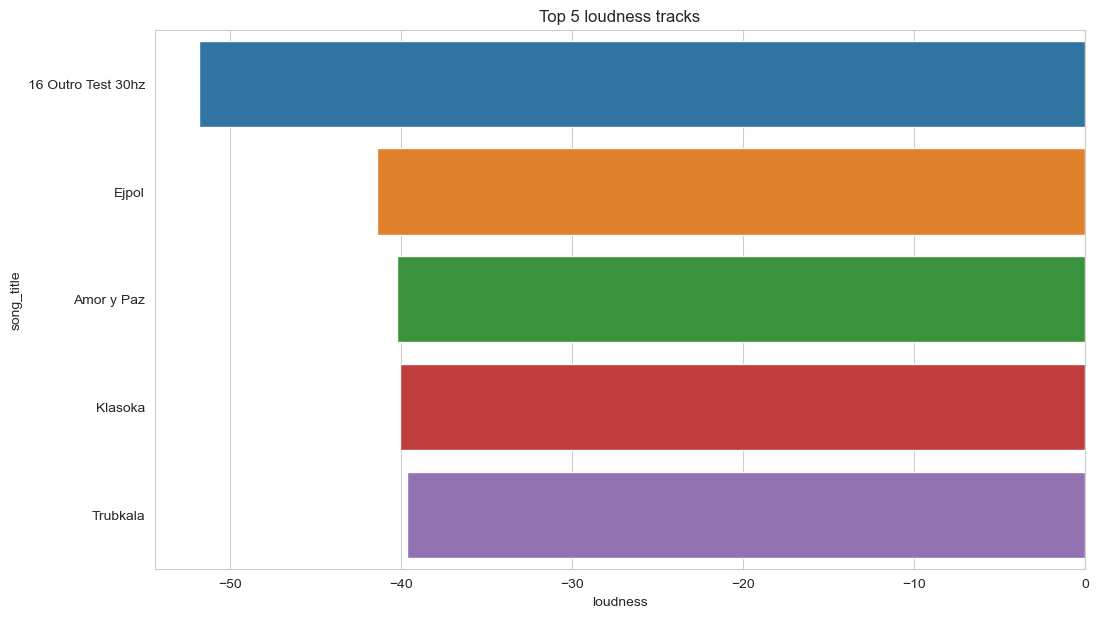

In [309]:
plt.figure(figsize=(12, 7))
sns.barplot(x="loudness", y="song_title", data=top_five_loudest_tracks)
plt.title("Top 5 loudness tracks")
plt.show()

### Artist with the most danceability song

In [310]:
top_five_artists_danceable_songs = df1[["danceability", "song_title", "artists"]].sort_values(by="danceability", 
                                                                                            ascending=False)[:5]
top_five_artists_danceable_songs

,danceability,song_title,artists
356101,0.987,Cool - Leonardo La Mark Remix,"['Spooner Street', 'Rio Dela Duna', 'Leonardo ..."
74928,0.987,New Year (2021),"['xxrichbeats', 'Egor4ik']"
509976,0.986,BABÁM,"['Horváth Tamás', 'Pixa']"
531897,0.982,Tera Suit,['Tony Kakkar']
92985,0.980,Dancing in My Room,['347aidan']


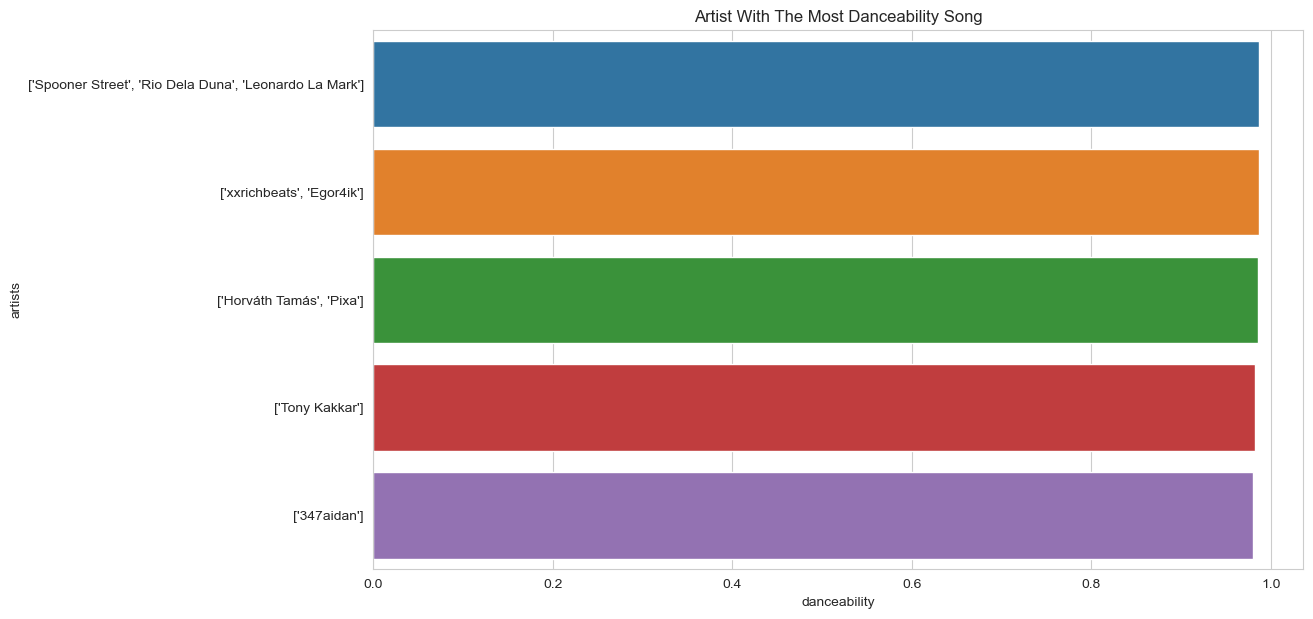

In [311]:
plt.figure(figsize=(12, 7))
sns.barplot(x="danceability", y="artists", data=top_five_artists_danceable_songs)
plt.title("Artist With The Most Danceability Song")
plt.show()

### Top 5 instrumentalness tracks

In [312]:
top_five_instrumental_tracks = df1[["instrumentalness", "song_title", "artists"]].sort_values(by="instrumentalness", 
                                                                                           ascending=False)[:5]
top_five_instrumental_tracks

,instrumentalness,song_title,artists
323752,1.000,Biely šum na spanie,['Biely Šum']
323793,1.000,Blissful White Noise,['Sea of Noise']
545931,1.000,Clean Baby Sleep White Noise (Loopable),"['Dream Supplier', 'Baby Sleeps', 'Granular No..."
200875,0.999,tres,['gustavord']
280040,0.996,"Peaceful, Best Computational Noise Expected Mo...",['White Noise Baby Sleep Music']


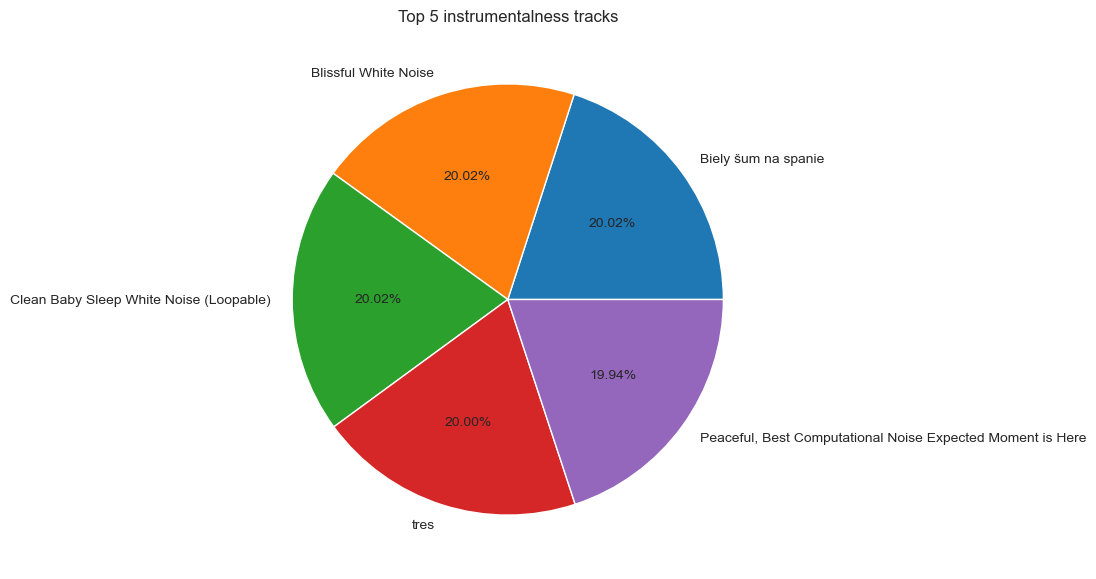

In [313]:
plt.figure(figsize=(12, 7))
plt.pie(x="instrumentalness", data=top_five_instrumental_tracks, autopct='%1.2f%%', labels=top_five_instrumental_tracks.song_title)
plt.title("Top 5 instrumentalness tracks")
plt.show()

In [314]:
sorted_df=df.sort_values('popularity',ascending=True)
sorted_df

,id,song_title,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
134528,2hV7SShXsBeomXtpd53QNh,You and the night and the music,0,168098,0,"['Libby Holman & Her Orchestra', 'Libby Holman']","['1BJcpnHvZBZSgUBEch0utn', '08czVWdmLSEES9nLc4...",1934,0.306,0.171,...,-16.752,0,0.0374,0.9810,0.000002,0.3720,0.352,127.261,5,1934
132451,2heB3jEdRgx83180axN3cd,Roses of Picardy,0,162843,0,['Paul Specht'],['1tCrPspkGQyLDhWFmTZanI'],1923,0.324,0.495,...,-14.571,1,0.0336,0.9780,0.760000,0.4060,0.702,207.380,4,1923
132450,2ew5dyayICmi1B9DHhQhEh,I'm the last of the red hot mamas,0,118465,0,['Sophie Tucker'],['58nEgrqod6YO5ZATASjIQ8'],1923,0.607,0.319,...,-15.191,1,0.3580,0.9960,0.577000,0.6640,0.795,84.080,4,1923
132449,2baUvPSWFyxIkSUECmghxC,Snakes hips,0,190063,0,['The Georgians'],['58LQXzq5kNsvPQdviB4ZyL'],1923,0.640,0.541,...,-7.905,1,0.0384,0.9960,0.879000,0.0853,0.844,98.589,4,1923
132448,2ZTaPJ3LuOz4DC6nnoeTEv,The man I love,0,172905,0,"['Sophie Tucker', 'Miff Mole']","['58nEgrqod6YO5ZATASjIQ8', '1WZqArTg7JOsXScvGF...",1923,0.487,0.163,...,-15.863,1,0.0449,0.9920,0.000041,0.0702,0.502,109.412,5,1923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.0212,0.000012,0.5430,0.644,118.051,4,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.1120,0.000000,0.2030,0.553,83.970,4,2020
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.1750,0.000000,0.1500,0.472,149.996,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.7210,0.000013,0.1050,0.132,143.874,4,2021


### Most Popular tracks

In [315]:
most_popular=df.query('popularity>90').sort_values('popularity',ascending=False)
most_popular[:10]

,id,song_title,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,2021
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,2020
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,...,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,2020
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,...,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,2021
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,...,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4,2020
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,...,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4,2019
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,...,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3,2020


In [316]:
df.set_index('release_date', inplace= True)
df.index= pd.to_datetime(df.index)
df

,id,song_title,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
release_date,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020
2020-10-21,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020
2020-09-02,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020


In [317]:
df[["artists"]].iloc[18]

artists    ['Victor Boucher']
Name: 1922-01-01 00:00:00, dtype: object

In [318]:
df['duration']=df['duration_ms'].apply(lambda x: round(x/1000))


In [319]:
df.drop('duration_ms',inplace=True,axis=1)

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'release_year'),
 Text(12.5, 0, 'duration')]

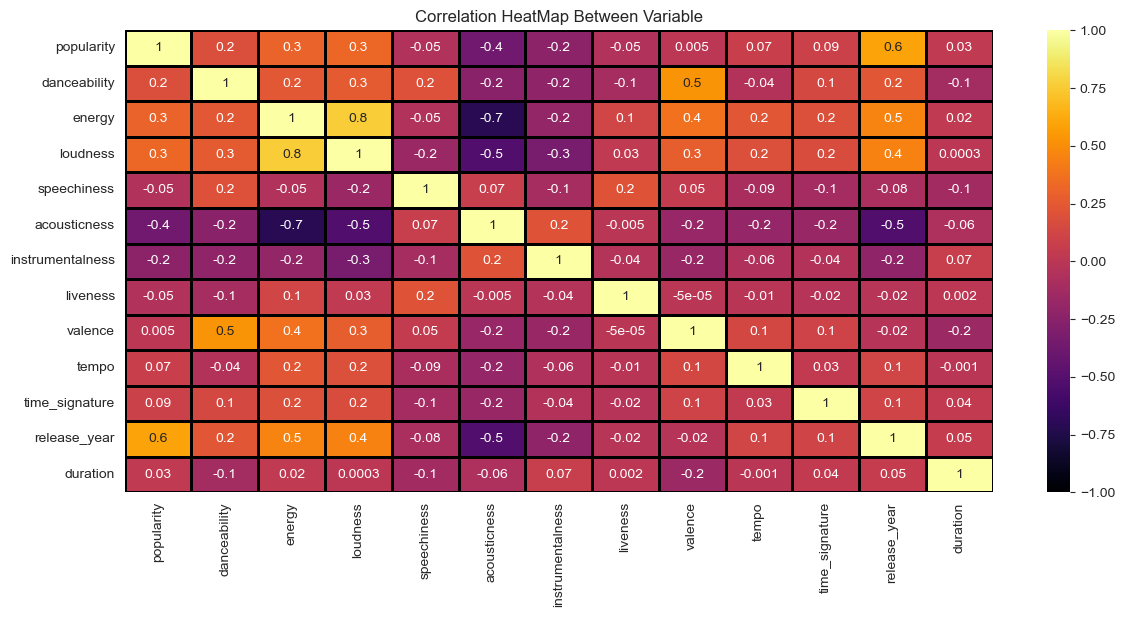

In [320]:
corr_df=df.drop(['key','mode','explicit'],axis=1).corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g",vmin=-1, vmax=1, center=0, cmap='inferno', linewidth=1, linecolor='Black')
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

# 1 being positively correlated and -1 being negatively correlated

In [321]:
sample_df=df.sample(int(0.004*len(df)))

In [322]:
print(len(sample_df))

2346


[Text(0.5, 1.0, 'Loudness vs Energy')]

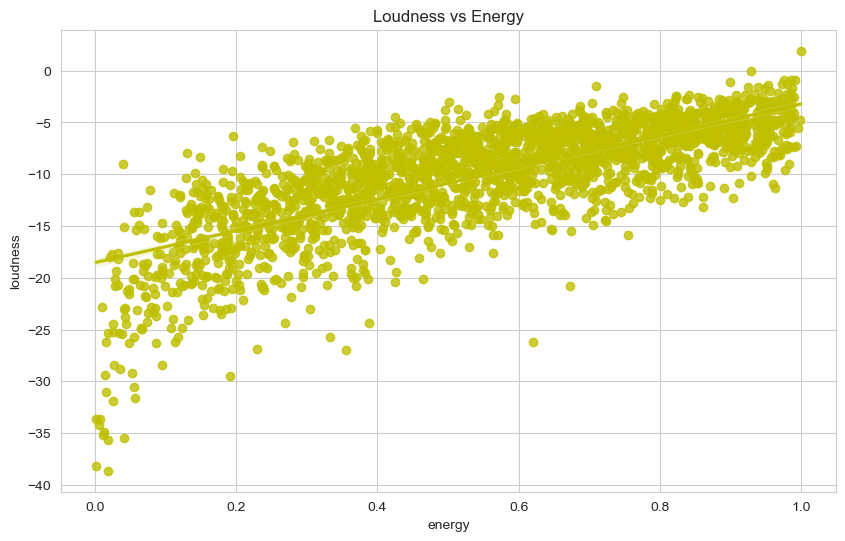

In [323]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y='loudness',x='energy',color='y').set(title="Loudness vs Energy")

## Loudness and Energy is highly correlated as loudness increases energy also increases

[Text(0.5, 1.0, 'popularity vs acousticness')]

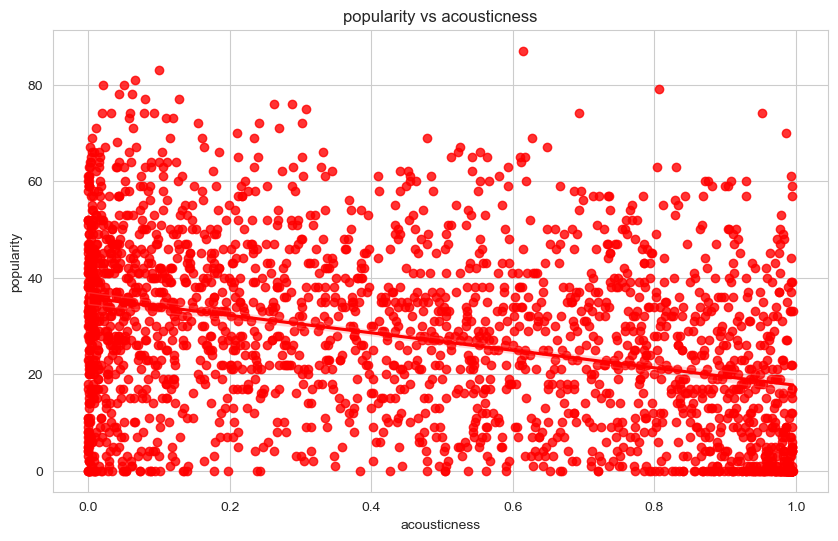

In [324]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y='popularity',x='acousticness',color='r').set(title="popularity vs acousticness")

## Popularity and Acousticness is highly correlated as Popularity decreases Acousticness also decreases.

In [325]:
df['dates']=df.index.get_level_values('release_date')

In [326]:
df.dates=pd.to_datetime(df.dates)
years= df.dates.dt.year

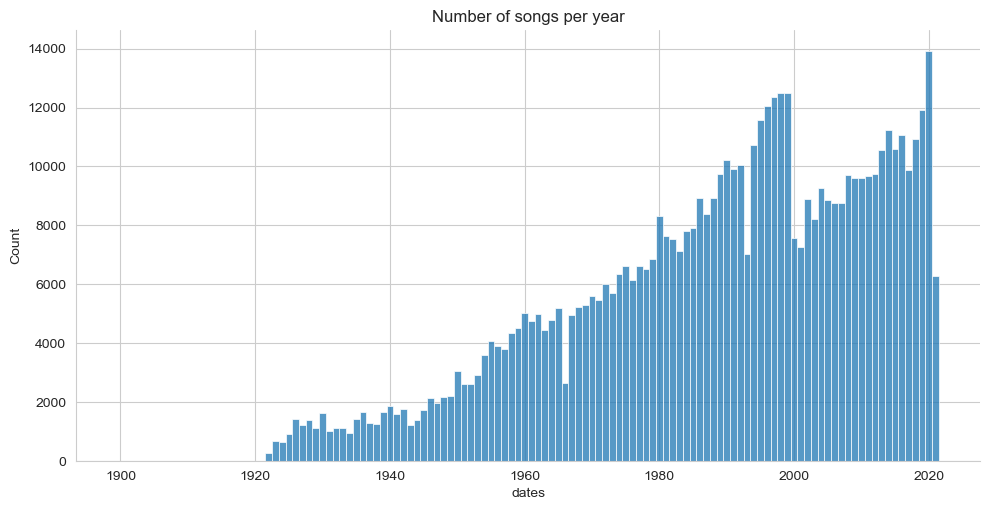

In [327]:
sns.displot(years,discrete=True,aspect=2,height=5,kind='hist').set(title='Number of songs per year')

### Number of songs released yearly has been increasing since 1922 but in 2021 the numbers significantly dropped.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938'),
  Text(18, 0, '1939'),
  

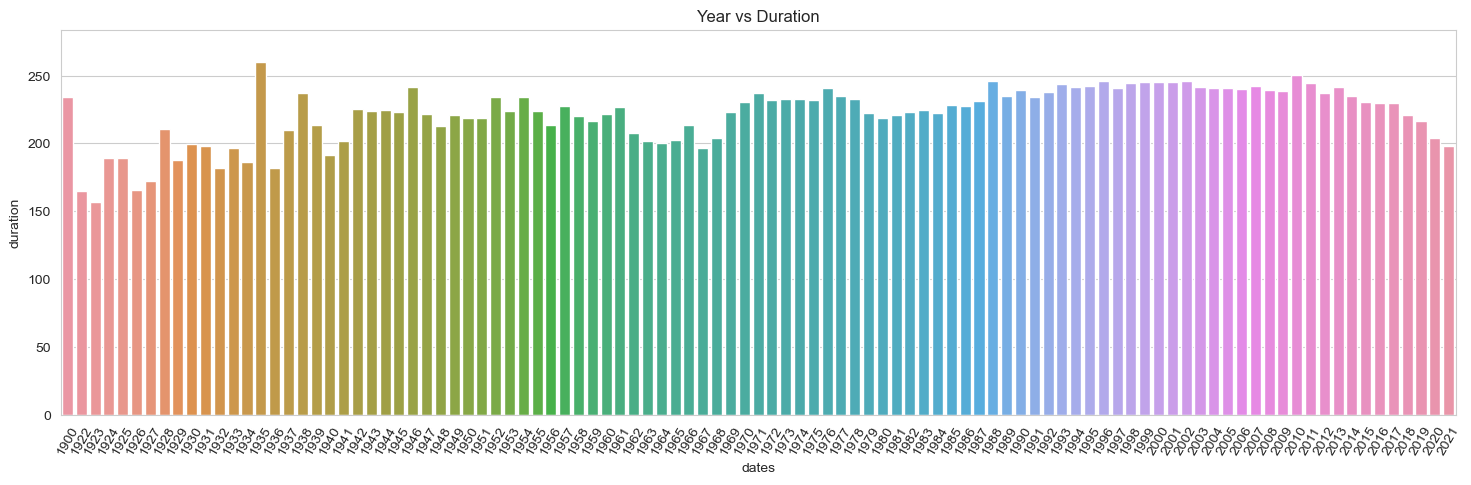

In [328]:
total_duration=df.duration
fig_dims=(18,5)
fig, ax= plt.subplots(figsize= fig_dims)
fig=sns.barplot(x=years,y=total_duration,ax=ax,errwidth=False).set(title='Year vs Duration')
plt.xticks(rotation=60)

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

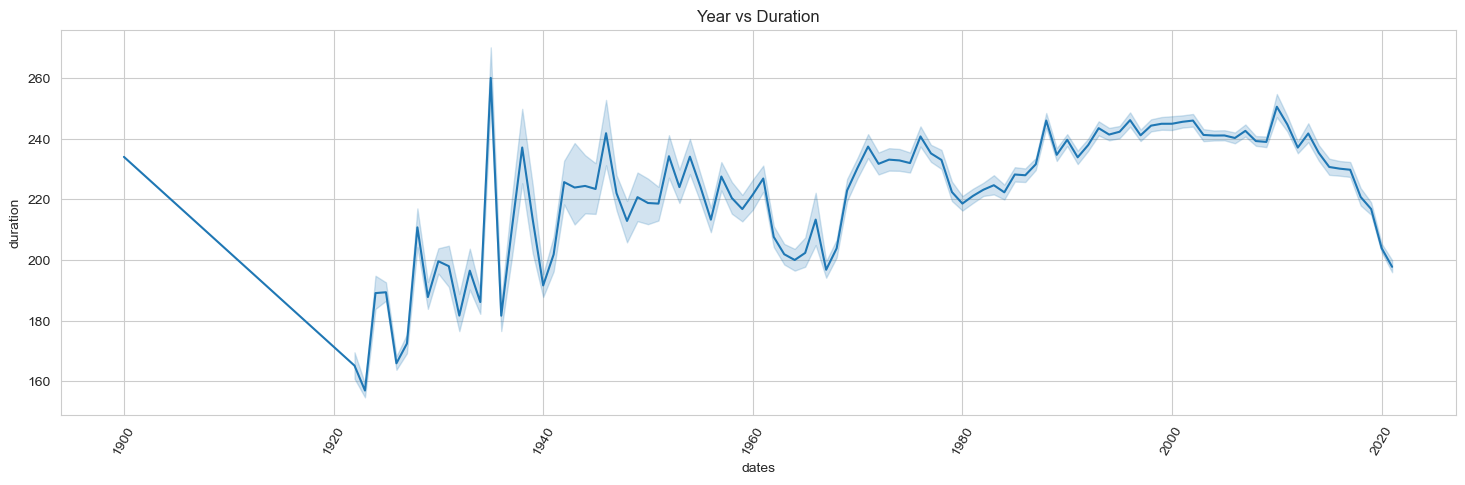

In [329]:
total_duration=df.duration
sns.set_style(style='whitegrid')
fig_dims=(18,5)
fig, ax= plt.subplots(figsize= fig_dims)
fig=sns.lineplot(x=years,y=total_duration,ax=ax).set(title='Year vs Duration')
plt.xticks(rotation=60)

### From 1970 there has been an increasing trend on duration of songs but from 2000 we can see a decreasing trend.


In [330]:
df_genre=pd.read_csv('SpotifyFeatures.csv')

In [331]:
df_genre

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


Text(0, 0.5, 'Genres')

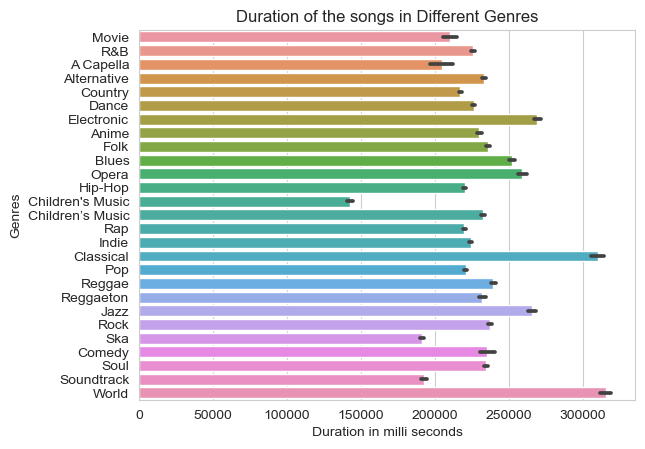

In [332]:
plt.title('Duration of the songs in Different Genres')
sns.color_palette('rocket', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=df_genre)
plt.xlabel('Duration in milli seconds')
plt.ylabel('Genres')

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

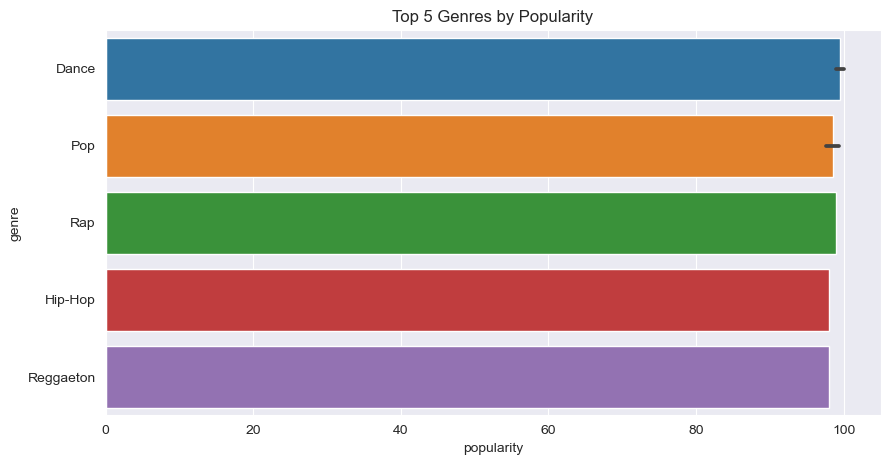

In [333]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
famous=df_genre.sort_values('popularity',ascending=False).head(10)
sns.barplot(y='genre',x='popularity',data=famous).set(title='Top 5 Genres by Popularity')
            